In [11]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")


In [12]:
df = pd.read_csv("/Users/alan0114/Desktop/Kaggle/Netflix/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [13]:
print(colored('There are {} rows and {} columns in the dataset.' .format(df.shape[0],df.shape[1]) , attrs=['bold']))

There are 6234 rows and 12 columns in the dataset.


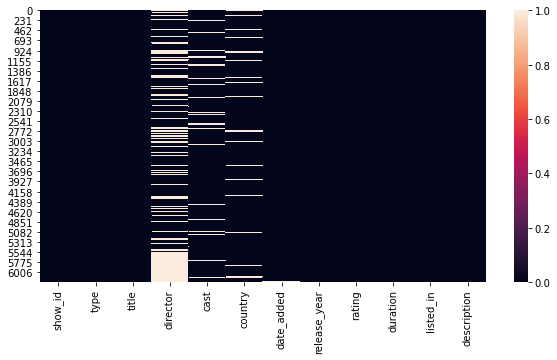

director's null rate : 31.58%
cast's null rate : 9.14%
country's null rate : 7.64%
date_added's null rate : 0.18%
rating's null rate : 0.16%


In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())
plt.show()

for i in df.columns:
    null_rate= df[i].isna().sum() / len(df) *100
    if null_rate >0:
        print("{}'s null rate : {}%". format(i,round(null_rate,2)))

In [22]:
df.drop(['director'], axis=1, inplace=True)
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [23]:
df['country'].replace(np.nan, "United States", inplace = True)
df ['cast'].replace(np.nan, 'No data', inplace = True)

In [25]:
df.dropna(inplace = True)
print(colored("There are {} rows and {} columns after handling the missing records in the dataset." .
             format(df.shape[0], df.shape[1])))

There are 6214 rows and 11 columns after handling the missing records in the dataset.


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 6222
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6214 non-null   int64 
 1   type          6214 non-null   object
 2   title         6214 non-null   object
 3   cast          6214 non-null   object
 4   country       6214 non-null   object
 5   date_added    6214 non-null   object
 6   release_year  6214 non-null   int64 
 7   rating        6214 non-null   object
 8   duration      6214 non-null   object
 9   listed_in     6214 non-null   object
 10  description   6214 non-null   object
dtypes: int64(2), object(9)
memory usage: 582.6+ KB


([<matplotlib.patches.Wedge at 0x11a038700>,
 [Text(0.631575476668263, 0.961047562439683, 'Movie'),
  Text(-0.6041156733348606, -0.9192628858118705, 'TV Show')],
 [Text(0.3569774433342356, 0.5432007961615599, '31.49%'),
  Text(-0.32951764000083306, -0.5014161195337475, '68.51%')])

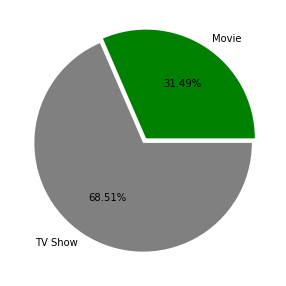

In [43]:
plt.figure(figsize=(10,5))
plt.pie(df['type'].value_counts().sort_values(), labels=df['type'].value_counts().index
           ,explode=[0.05,0] , 
           autopct='%1.2f%%', colors = ['Green','grey'])

In [62]:
from collections import Counter
country_data = df['country']
country_count= pd.Series(dict(Counter(",".join(country_data).replace(' ,',',').
                                     replace(', ',',').split(',')))).sort_values(ascending= False)

In [65]:
a=dict(Counter(",".join(country_data).replace(' ,',',').
                                     replace(', ',',').split(',')))
a

{'United States': 3072,
 'India': 838,
 'South Korea': 162,
 'China': 120,
 'United Kingdom': 601,
 'Spain': 178,
 'Bulgaria': 8,
 'Canada': 318,
 'Chile': 23,
 'Denmark': 38,
 'Sweden': 33,
 'Netherlands': 37,
 'Belgium': 66,
 'France': 271,
 'Uruguay': 9,
 '': 3,
 'Thailand': 56,
 'Pakistan': 23,
 'Turkey': 87,
 'Brazil': 66,
 'Italy': 66,
 'Indonesia': 52,
 'Ireland': 33,
 'Hong Kong': 97,
 'Morocco': 6,
 'Mexico': 129,
 'Vietnam': 4,
 'Argentina': 68,
 'Nigeria': 36,
 'Japan': 229,
 'Germany': 151,
 'Greece': 8,
 'Norway': 21,
 'Switzerland': 15,
 'United Arab Emirates': 21,
 'Lebanon': 9,
 'Cambodia': 3,
 'Russia': 21,
 'Poland': 27,
 'Israel': 26,
 'Australia': 124,
 'Portugal': 4,
 'Egypt': 54,
 'Taiwan': 75,
 'Austria': 10,
 'Czech Republic': 15,
 'Senegal': 2,
 'Soviet Union': 3,
 'Peru': 9,
 'Ukraine': 3,
 'Malaysia': 21,
 'South Africa': 30,
 'Nepal': 2,
 'Philippines': 47,
 'Serbia': 5,
 'Colombia': 36,
 'Singapore': 30,
 'Luxembourg': 7,
 'West Germany': 5,
 'Cayman Island

In [78]:
top20country= country_count.head(20)
top20country

United States     3072
India              838
United Kingdom     601
Canada             318
France             271
Japan              229
Spain              178
South Korea        162
Germany            151
Mexico             129
Australia          124
China              120
Hong Kong           97
Turkey              87
Taiwan              75
Argentina           68
Brazil              66
Italy               66
Belgium             66
Thailand            56
dtype: int64

(-1.108260722670404,
 1.1003933677462097,
 -1.1018378387682526,
 1.1255182315979064)

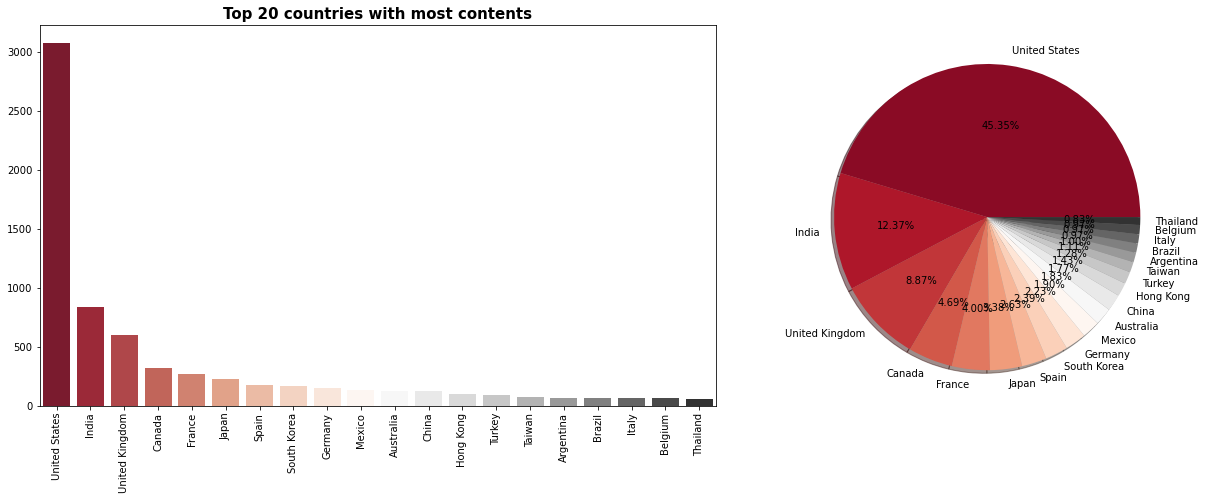

In [92]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 7))
gs = gridspec.GridSpec(nrows=1, ncols=2, height_ratios=[6], width_ratios=[10, 5])  

ax= plt.subplot(gs[0])
sns.barplot(top20country.index, top20country, ax=ax, palette='RdGy')

ax.set_xticklabels(top20country.index, rotation='90')

ax.set_title('Top 20 countries with most contents' , fontsize = 15, fontweight='bold')

ax2 = plt.subplot(gs[1])
ax2.pie(top20country, labels=top20country.index, shadow=True, colors=sns.color_palette("RdGy", n_colors=20),
       autopct='%1.2f%%')
ax2.axis('equal') 



In [213]:
gs

GridSpec(1, 2, height_ratios=[6], width_ratios=[10, 5])

### If a producer wants to release some content, which month must they do? 

In [99]:
netflix_overall = pd.read_csv("/Users/alan0114/Desktop/Kaggle/Netflix/netflix_titles.csv")

In [102]:
netflix_overall.count()
netflix_shows = netflix_overall[netflix_overall['type']=='TV Show']
netflix_movies = netflix_overall[netflix_overall['type']=='Movie']

In [105]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])


In [115]:
#[::-1] 倒序
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
# T 轉置 
df1 = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df1

year,2008,2012,2013,2014,2015,2016,2017,2018,2019,2020
month,,,,,,,,,,
December,0.0,0.0,0.0,1.0,7.0,44.0,43.0,75.0,53.0,0.0
November,0.0,0.0,0.0,3.0,2.0,18.0,33.0,48.0,87.0,0.0
October,0.0,1.0,2.0,0.0,5.0,19.0,39.0,55.0,84.0,0.0
September,0.0,0.0,1.0,0.0,1.0,19.0,36.0,49.0,66.0,0.0
August,0.0,1.0,1.0,0.0,0.0,19.0,41.0,42.0,71.0,0.0
July,0.0,1.0,0.0,0.0,3.0,12.0,35.0,32.0,78.0,0.0
June,0.0,0.0,0.0,0.0,3.0,8.0,30.0,31.0,61.0,0.0
May,0.0,0.0,0.0,0.0,2.0,5.0,26.0,32.0,68.0,0.0
April,0.0,0.0,1.0,1.0,6.0,8.0,31.0,34.0,58.0,0.0


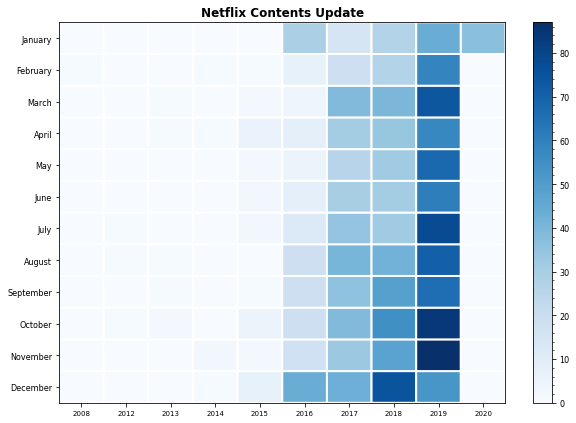

In [145]:
plt.figure(figsize=(10,7))
plt.pcolor(df1, cmap='Blues' , edgecolors='white', linewidths=2)
plt.title('Netflix Contents Update', fontsize=12, fontweight='bold')

# add the label
plt.xticks( np.arange(0.5, len(df1.columns)), df1.columns, fontsize=7)

plt.yticks(np.arange(0.5, len(df1.index)), df1.index, fontsize=8)

# color legand
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()

## Movie ratings analysis

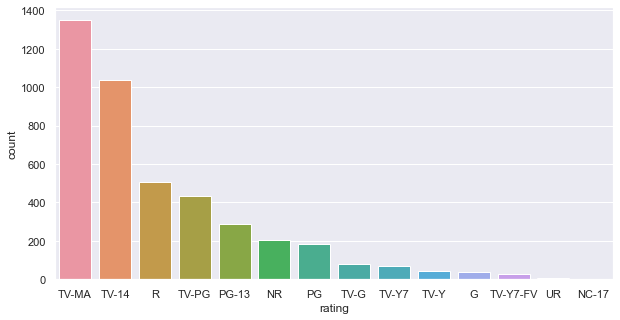

In [162]:
plt.figure(figsize=(10,5))
sns.set(style = 'darkgrid')
ax= sns.countplot(x='rating', data=netflix_movies, order=
                 netflix_movies['rating'].value_counts().index)

In [161]:
o=netflix_movies['rating'].value_counts()
type(o)

pandas.core.series.Series

## Years wise analysis

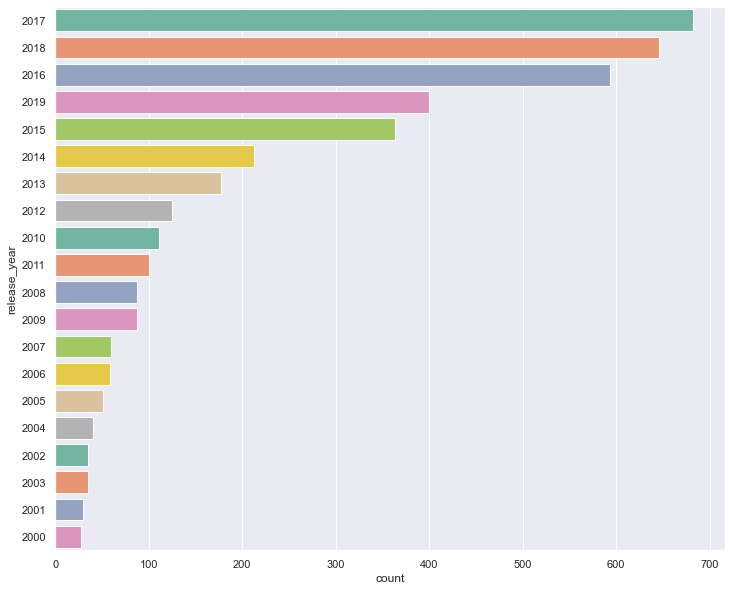

In [166]:
plt.figure(figsize=(12,10))
sns.countplot(y='release_year',data = netflix_movies,palette='Set2', order=
             netflix_movies['release_year'].value_counts().index[0:20])

In [196]:
netflix_movies['duration'] = netflix_movies['duration'].map(lambda x :x.rstrip('min'))
netflix_movies['duration']


0        90 
1        94 
4        99 
6       110 
7        60 
        ... 
5577     70 
5578    102 
5579     88 
5580    109 
6231     60 
Name: duration, Length: 4265, dtype: object

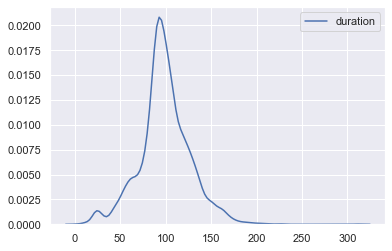

In [212]:
sns.set(style='darkgrid')
sns.kdeplot(netflix_movies['duration'])

#### So, a good amount of movies on Netflix are among the duration of 75-120 mins.

In [219]:
# analyse the genres of the movies

from collections import Counter

genres = list(netflix_movies['listed_in'])

gen=[]

for i in genres:
    i=list(i.split(","))
    for j in i :
        gen.append(j.replace( " ", ""))

g = Counter(gen)
g

Counter({'Children&FamilyMovies': 378,
         'Comedies': 1113,
         'Stand-UpComedy': 281,
         'InternationalMovies': 1927,
         'Sci-Fi&Fantasy': 193,
         'Thrillers': 392,
         'Action&Adventure': 597,
         'Dramas': 1623,
         'CultMovies': 55,
         'IndependentMovies': 552,
         'RomanticMovies': 376,
         'Documentaries': 668,
         'HorrorMovies': 262,
         'Music&Musicals': 243,
         'AnimeFeatures': 45,
         'Faith&Spirituality': 47,
         'LGBTQMovies': 60,
         'Movies': 56,
         'ClassicMovies': 84,
         'SportsMovies': 157})

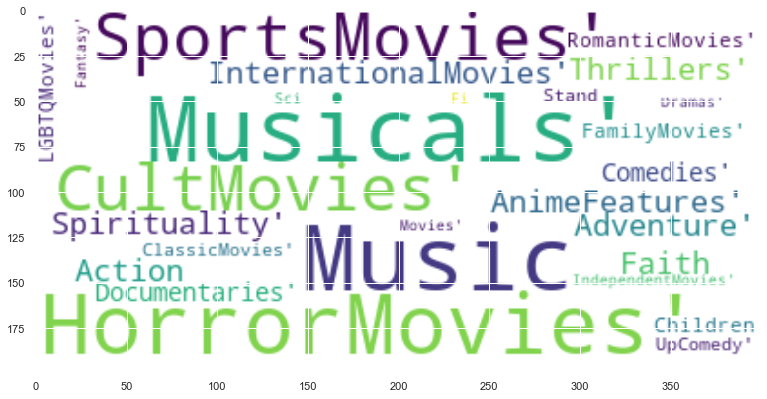

In [241]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))
plt.rcParams['figure.figsize']=(13,13)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(str(text))

plt.imshow(wordcloud, interpolation='bilinear')

plt.show()

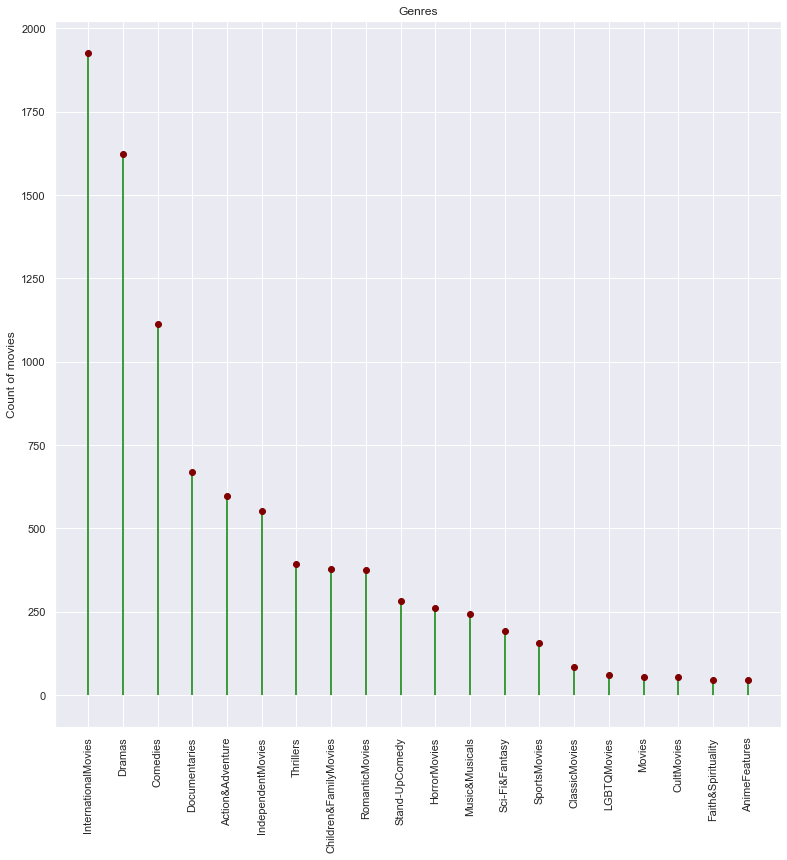

<Figure size 720x720 with 0 Axes>

In [271]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");